# CARGA DE LAS LIBRERIAS

In [50]:
import pandas as pd
import numpy as np
%matplotlib inline
import pandas_profiling as pp
from ydata_profiling import ProfileReport


# CARGA DEL DATASET

In [2]:
data_house = pd.read_csv('/Users/jonmaldosan/Documents/PAPD 2023/4to. Ciclo/Product_Developmet/Laboratorio_2/train.csv')
data_house.head()

id  longitude  latitude  housing_median_age  total_rooms  \
0   9744    -121.65     36.77                  15         2191   
1  13893    -116.27     34.13                  37          452   
2  18277    -122.07     37.34                  35         1172   
3  16176    -122.39     37.74                  52          126   
4   8843    -118.38     34.09                  28         4001   

   total_bedrooms  population  households  median_income  median_house_value  \
0           358.0        1150         330         4.7969            227500.0   
1           109.0         184          59         3.7292             65800.0   
2           184.0         512         175         7.3561            500001.0   
3            24.0          37          27        10.2264            225000.0   
4          1352.0        1799        1220         2.5784            272900.0   

  ocean_proximity  
0       <1H OCEAN  
1          INLAND  
2       <1H OCEAN  
3        NEAR BAY  
4       <1H OCEAN

# ANALISIS EXPLORATORIO Y PROFILING DE LOS DATOS

In [51]:
ProfileReport(data_house, title="Pandas DataFrame")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### DESCRIPCION DE LOS WARNINGS GENERADOS EN EL EDA

##### Correlaciones Altas:
1. Se indentificó una alta correlación entre las variable "households", "population" "total_bedrooms" y "total_rooms. Esto sugiere que estas variables están fuertemente relacionadas entre sí.
2. latitude con longitude: Indica una alta correlación entre las variables de ubicación geográfica "latitude" y "longitude". Esto es común ya que representan coordenadas geográficas.
3. median_house_value con median_income: Muestra una alta correlación entre el valor medio de las casas y el ingreso medio. Esto puede ser esperado, ya que el ingreso medio de un área puede influir en el valor medio de las viviendas.

##### Distribución Uniforme y Valores Unicos:
1. Id es uniformemente distribuido: La variable "id" tiene una distribución uniforme, lo que significa que los valores están dispersos de manera uniforme en todo el rango posible.
2. Id tiene valores únicos: Cada valor en la variable "id" es único. Esto sugiere que "id" puede ser un identificador único para cada registro en el conjunto de datos.


# SETUP E INGENIERIA DE CARACTERISTICAS

In [3]:
from pycaret.regression import *

In [53]:
exploracion = setup(
    data_house, 
    target='median_house_value',
    normalize=True,
    normalize_method='minmax',
    transformation=True,
    train_size=0.8,
    session_id=123)

##### Definiciones y justificaciones:

1. Target type (Regression): Indica que se trata de un problema de regresión, ya que se está prediciendo un valor numérico.
2. Original data shape ((14447, 11)): La forma del conjunto de datos original antes de cualquier transformación, que tiene 14447 filas y 11 columnas.
3. Transformed data shape ((14447, 15)): La forma del conjunto de datos después de la transformación. Se han modificado características, resultando en 15 columnas.
4. Transformed train set shape ((11557, 15)): La forma del conjunto de datos de entrenamiento después de la transformación, con 11557 filas y 15 columnas.
5. Transformed test set shape ((2890, 15)): La forma del conjunto de datos de prueba después de la transformación, con 2890 filas y 15 columnas.
6. Numeric features (9): Número de características numéricas en el conjunto de datos.
7. Categorical features (1): Número de características categóricas en el conjunto de datos.
8. Rows with missing values (0.9%): Porcentaje de filas en el conjunto de datos que tienen valores faltantes.
9. Preprocess (True): Indica que se ha realizado un preprocesamiento en el conjunto de datos.
10. Imputation (typesimple): Tipo de imputación realizada en el conjunto de datos. En este caso, se ha utilizado una imputación simple.
11. Numeric imputation (mean): Método de imputación para características numéricas, que en este caso es la imputación de la media.
12. Categorical imputation (mode): Método de imputación para características categóricas, que en este caso es la imputación de la moda.
13. Maximum one-hot encoding (25): Número máximo de codificaciones one-hot permitidas.
14. Encoding method (None): Método de codificación utilizado para las características categóricas. En este caso, no se ha aplicado ninguna codificación específica.
15. Transformation (True): Indica que se ha realizado una transformación en el conjunto de datos.
16. Transformation method (yeo-johnson): Método de transformación aplicado. En este caso, se ha utilizado la transformación Yeo-Johnson.
17. Normalize (True): Indica que se ha normalizado el conjunto de datos.
18. Normalize method (minmax): Método de normalización utilizado, que en este caso es la normalización Min-Max.
19. Fold Generator (KFold): Generador de pliegues utilizado para la validación cruzada. En este caso, se ha utilizado KFold.
20. Fold Number (10): Número de pliegues utilizados en la validación cruzada.

# DATA TRAIN Y DATA TEST

In [9]:
# Division de los datos para entrenamiento y prueba
train_data = get_config('X_train')
test_data = get_config('X_test')

# ENTRENAMIENTO Y SELECCION AUTOMATICA DE MODELOS

In [69]:
# Comparar modelos y almacenar los resultados
select_models = compare_models(sort='RMSE', n_select=3)

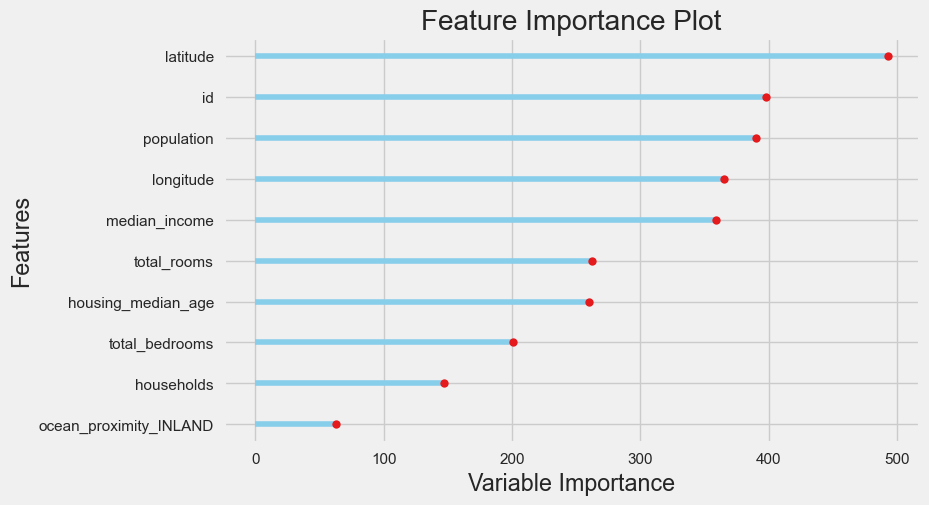

<Figure size 800x550 with 0 Axes>

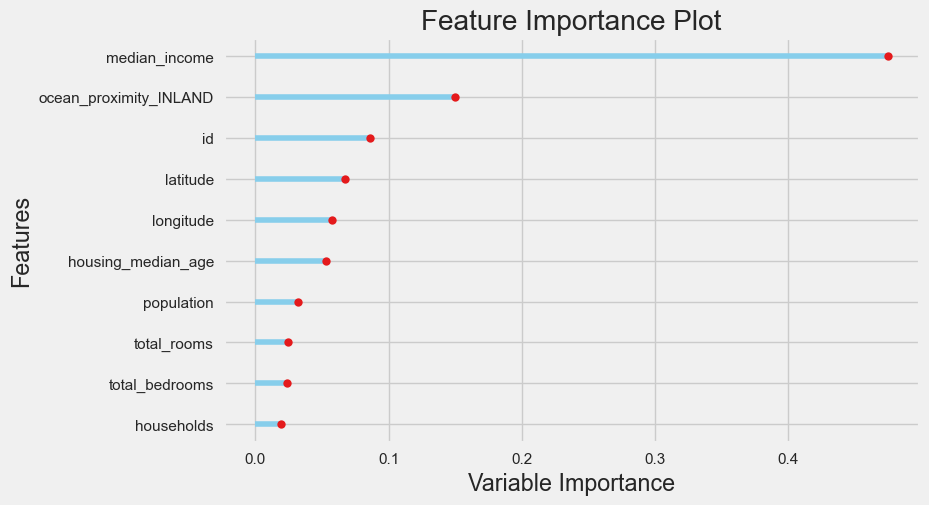

<Figure size 800x550 with 0 Axes>

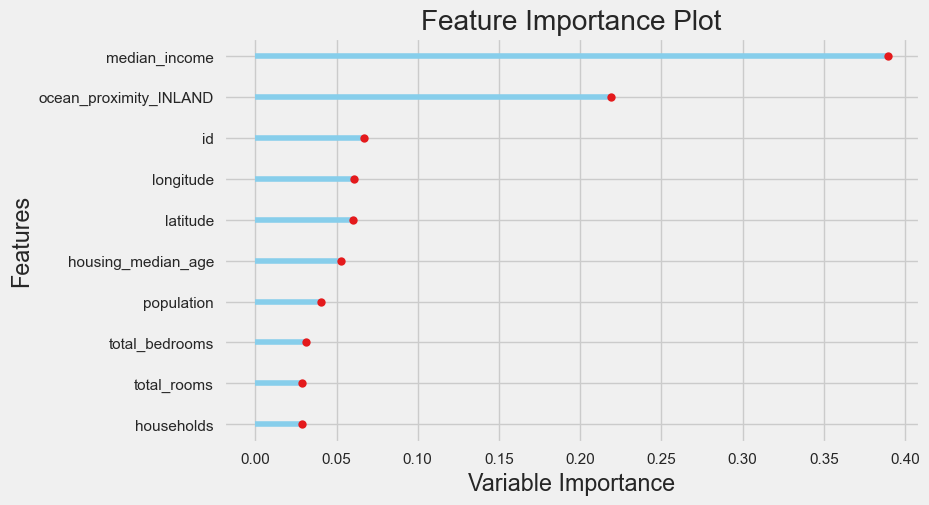

<Figure size 800x550 with 0 Axes>

In [83]:
import matplotlib.pyplot as plt

for model in select_models:
    # Obtener el tipo de modelo para personalizar el título
    model_type = str(model).split('(')[0]
    
    # Crear el gráfico de importancia de características
    plot_model(model, plot='feature', verbose=False)  # Agrega verbose=False para evitar la duplicación
    
    # Agregar un texto como título personalizado
    plt.suptitle(f'Importancia de características - {model_type}', y=1.05, fontsize=16)
    
    # Mostrar el gráfico
    plt.show()

In [58]:
print(best_model)

LGBMRegressor(random_state=123)


In [15]:
tuned_best = tune_model(estimator=best_model)

Initiated  . . . . . . . . . . . . . . . . . .              16:08:21
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightG

In [17]:
second_model = create_model('rf')